# **Flight Price Prediction using Linear Regression Models**

**Date: 29-03-2022**

**Yohanes Setiawan**

**Surabaya, Indonesia**

**yoh.set95@gmail.com**

# **Business Understanding**

## Introduction
- 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. 
- A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## Problem Statement

Passengers are difficult to calculate a range of ticket price to make better plan for their trip

## Goal

To give feedbacks to passengers in India for their best trip planning and predict the ticket price based on given features in Easemytrip application

## Research Questions
- How is the price affected when tickets are bought in just 1 or 2 days before departure?
- Does ticket price change based on the departure time and arrival time?
- Does price vary with Airlines?
- How does the ticket price vary between Economy and Business class?
- Does ticket price change based on the number of stops between the source and destination city?
- How to predict flight ticket price?
- What insights can we get through selected predictive model?

## Objective Statements

- Get insight about the effect of ticket price which are bought in just 1 or 2 days before departure
- Get insight about ticket price change based on the departure time and arrival time
- Get insight about variations of ticket price with airlines
- Get insight about variation of ticket price between economy and business class
- Get insight about ticket price change based on the number of stops between the source and destination city
- Conduct research to find the best model of flight price prediction using Linear Regression Models for passengers in India
- Get insight through selected predictive model

# **Analytical Approach**

- Descriptive analysis
- Graph analysis
- Table analysis
- Predictive analysis (Regression Problem)

# **Data Understanding**

- Data source was secondary data and was collected from Ease my trip website
- A total of 300261 distinct flight booking options was extracted from the site
- Data was collected for 50 days, from February 11th to March 31st, 2022

The various features of the dataset are explained below:

- Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

- Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

- Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

- Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

- Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

- Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

- Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

- Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

- Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

- Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

- Price: Target variable stores information of the ticket price.

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Taking dataset from Drive
!cp '/content/drive/My Drive/flight_prediction.csv' '/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

pd_flight = pd.read_csv("/content/flight_prediction.csv")
pd_flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Dataset Info

In [ ]:
pd_flight.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [ ]:
pd_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# Devide categorical and numerical variable
num = ['Unnamed: 0', 'duration', 'days_left', 'price']
cat = ['airline', 'source_city','departure_time','stops','arrival_time','destination_city', 'class']

In [ ]:
pd_flight["flight"].unique()
len(pd_flight["flight"].unique())

1561

## Checking Missing Value

In [ ]:
print("Missing Value from the Dataset for each column in pd_train: ")
print(pd_flight.isnull().sum())

Missing Value from the Dataset for each column in pd_train: 
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


There is no missing value in this dataset.

## Checking Duplicated Data

In [ ]:
pd_flight.duplicated().sum()

0

There is no duplicated data in this dataset.

Because the data has already been clean, then cleaning data is not needed to be done.

# **Exploratory Data Analysis (EDA)**

## Descriptive Statistics

### For numerical columns

In [ ]:
pd_flight[num].describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### For categorical columns

In [ ]:
pd_flight[cat].describe()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city
count,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai
freq,127859,3235,61343,71146,250863,91538,59097


Insights:

- The most favorite airline is Vistara
- The passengers mostly depart from Delhi 
- The most likable destination city is Mumbai
- The passengers are likely to choose one stop for time efficiency
- Morning departure time has been the best time for passengers
- The passengers like to arrive at night
- There are 1561 unique values in column "flight". Therefore, it should be removed to avoid redudancy feature

## Univariate Distribution of Observations

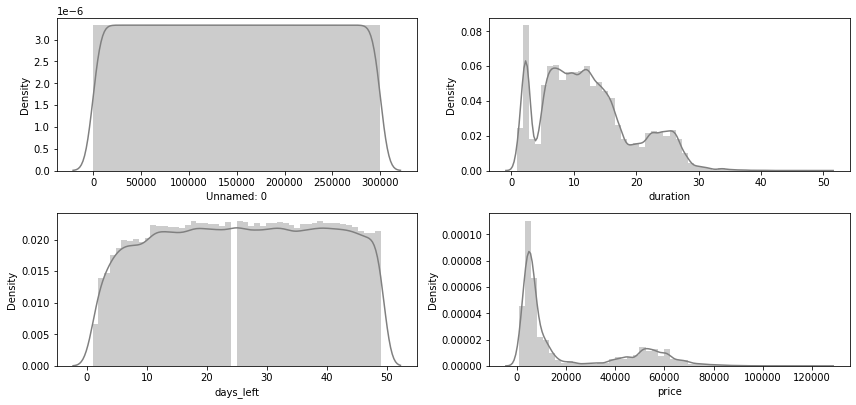

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(0, len(num)):
    plt.subplot(3, len(num)/2, i+1)
    sns.distplot(pd_flight[num[i]], color='gray')
    plt.tight_layout()

Insight:

- Uniform distribution: "Unnamed: 0" and "days_left"
- Skewed: "duration", "price"

## Box Plot

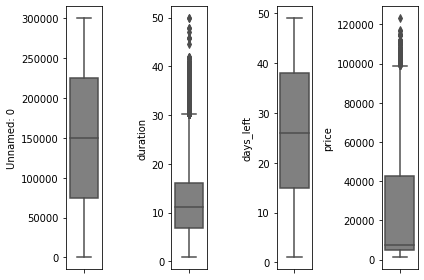

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=pd_flight[num[i]], color='gray', orient='v')
    plt.tight_layout()

Insight: 

- The only independent features/columns with outlier is "duration".
- "price" is the dependent feature with outlier. However, this can be ignored because "price" is our target variable.
- Passengers with duration between cities for more than 30 hours are considered as outliers

Therefore, outlier in
 "duration" should be handled.

## Categorical Plot

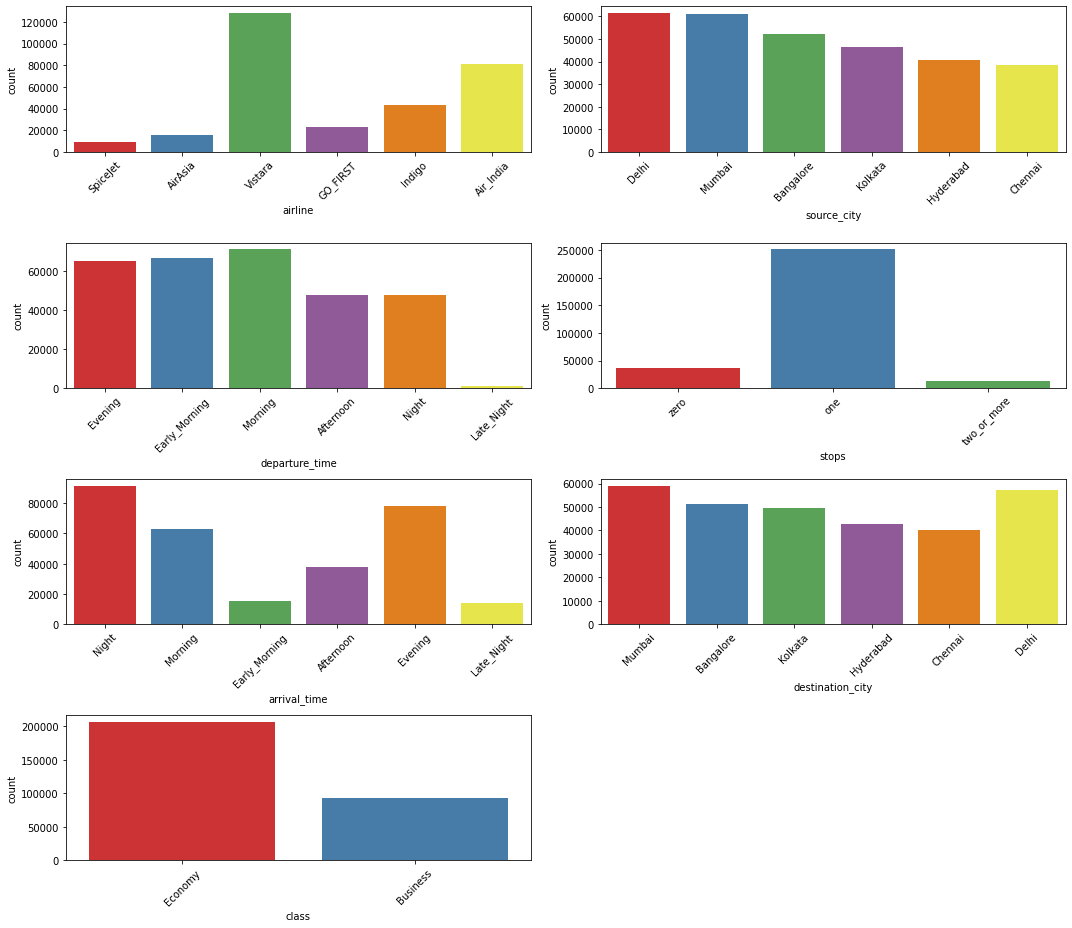

In [ ]:
plt.figure(figsize=(15,13))
for i in range(0, len(cat)):
    plt.subplot(4,2, i+1) 
    sns.countplot(data=pd_flight[cat], x=cat[i], palette='Set1')
    plt.xticks(rotation=45)
    plt.xlabel(cat[i])
    plt.tight_layout()

Insights:

- Top 3 best seller airline in Easemytrip : 1. Vistara, 2. Air India, 3. Indigo
- Top 3 source city : 1. Delhi, 2. Mumbai, 3. Bangalore
- Top 3 destination city : 1. Mumbai, 2. Delhi, 3. Bangalore
- Top 3 departure time : 1. Morning, 2. Early Morning, 3. Evening
- Top 3 arrival time : 1. Night, 2. Evening, 3. Morning
- Passengers do not like two or more stops between the source and destination cities
- Economy class has been the best seller in Easemytrip
- Late Night is less chosen by passengers either departure or arrival

## Correlation

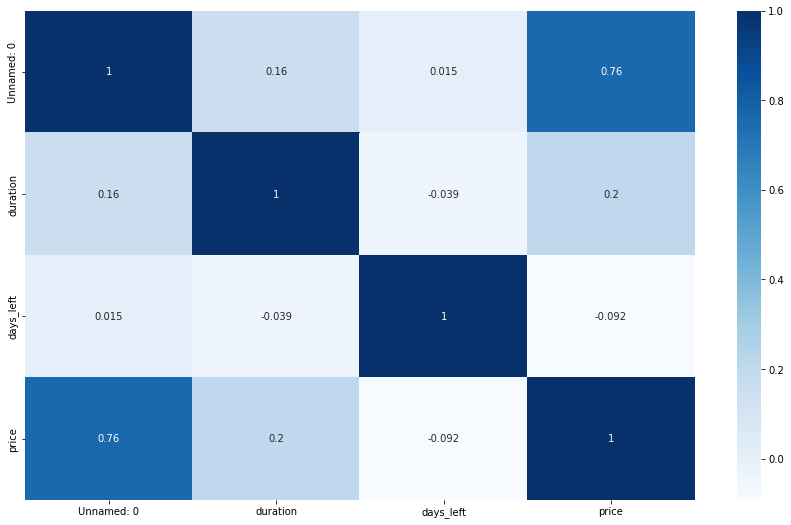

In [ ]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(pd_flight.corr(), cmap='Blues', annot = True);

Insight: Column "Price" is highly correlated with "Unnamed: 0". This means the higher values in "Unnamed: 0", also the higher values in "Price" as the target variable. 

However, the "Unnamed: 0" is the ID of the customer, which is sorted from the lowest bought ticket price until the highest bought ticket price.

Therefore, column "Unnamed: 0" will affect the predicted model seriously and need to be removed.

## D'Agustino K^2 Normality Test For Target Variable

The writer has discovered that column "price", which is the dependent variable, is skewed. 

Now, the writer wants to do a normality test to check the normality of the dependent variable.

Although it is unnecessery to be normally distributed, higher accuracy can be achieved if it is normally distributed.

- alpha = 0.05 (5%)

- H0 (Null Hypothesis): Column "Price" is normally distributed

- H1 (Alternative Hypothesis): Column "Price" is not normally distributed

- The null hypothesis will be rejected if p-value < alpha

In [ ]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(pd_flight.price.values)

NormaltestResult(statistic=41901.310058391085, pvalue=0.0)

Because the p-value equals to 0, which rejects the null hypothesis (p-value=0<0.05=alpha), our target variable (Price) is not normally distributed.

Finally, the target variable will be transfromed using Box Cox Transformation.

However, the result from non Box Cox Transformation is still conducted in order to compare between the Box Cox Transformation.

The model with the best result will be chosen for the next stage of further regression models.

# **Get Insights**

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [ ]:
pd_flight["days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

We will check days_left = 1 and days_left = 2

In [ ]:
days = pd_flight.loc[pd_flight["days_left"] <= 30]
days.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


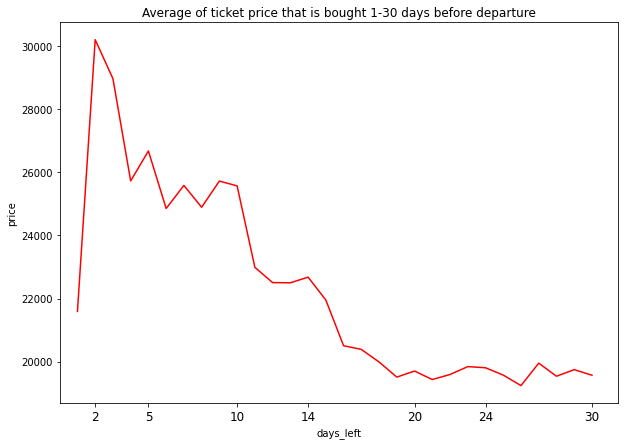

In [ ]:
plt.figure(figsize = (10,7))
days.groupby("days_left")["price"].mean().plot(color="red")
x_tick=[2, 5, 10, 14, 20, 24, 30]
plt.xlim(left=0)
plt.ylabel('price')
plt.xticks(x_tick, fontsize=12)
plt.title("Average of ticket price that is bought 1-30 days before departure");

Insight: 
- The ticket price becomes higher when the ticket is booked in 1-2 days before departure and comes to the peak when it is booked 3 days before departure
- The ticket price becomes lower when it is booked around 25-30 days before departure

### Does ticket price change based on the departure time and arrival time?

In [ ]:
pd_flight["departure_time"].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [ ]:
pd_flight["arrival_time"].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [ ]:
departure = pd_flight.groupby(["departure_time","arrival_time"])["price"].mean().reset_index()
departure.head()

,departure_time,arrival_time,price
0,Afternoon,Afternoon,14741.746011
1,Afternoon,Early_Morning,21159.511401
2,Afternoon,Evening,15548.836651
3,Afternoon,Late_Night,10811.615662
4,Afternoon,Morning,26056.580994


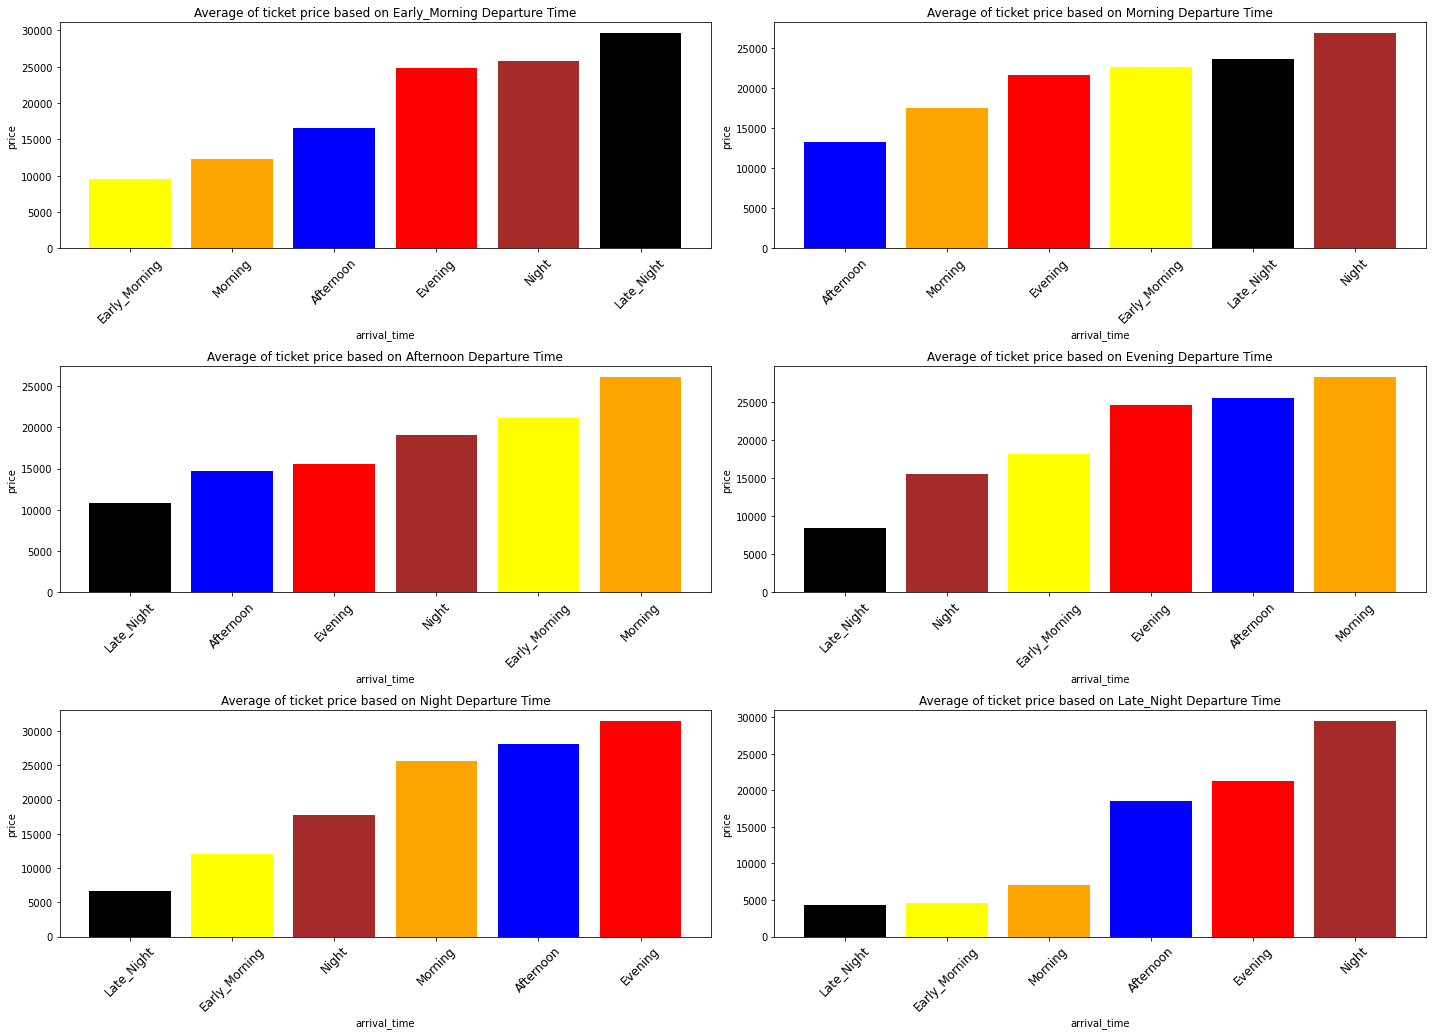

In [ ]:
plt.figure(figsize=(20,18))
for i in range(0, 6):
    plt.subplot(4,2, i+1) 
    if i==0:
      Early_Morning = departure.loc[departure["departure_time"] == "Early_Morning"][["arrival_time","price"]].sort_values(by="price").reset_index()
      my_colors = ["yellow", "orange", "blue", "red", "brown", "black"]
      #Sequence: Early_Morning, Morning, Afternoon, Evening, Night, Late Night
      plt.bar(Early_Morning["arrival_time"], Early_Morning["price"], color=my_colors)
      plt.xlabel('arrival_time')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Early_Morning Departure Time")
    elif i==1:
      Morning = departure.loc[departure["departure_time"] == "Morning"][["arrival_time","price"]].sort_values(by="price").reset_index()
      my_colors = ["blue","orange","red", "yellow", "black", "brown"]
      plt.bar(Morning["arrival_time"], Morning["price"], color=my_colors)
      plt.xlabel('arrival_time')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Morning Departure Time")
    elif i==2:
      Afternoon = departure.loc[departure["departure_time"] == "Afternoon"][["arrival_time","price"]].sort_values(by="price").reset_index()
      my_colors = ["black", "blue", "red", "brown", "yellow", "orange"]
      plt.bar(Afternoon["arrival_time"], Afternoon["price"], color=my_colors)
      plt.xlabel('arrival_time')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Afternoon Departure Time")
    elif i==3:
      evening = departure.loc[departure["departure_time"] == "Evening"][["arrival_time","price"]].sort_values(by="price").reset_index()
      my_colors = ["black","brown", "yellow", "red", "blue","orange"  ]
      plt.bar(evening["arrival_time"], evening["price"], color=my_colors)
      plt.xlabel('arrival_time')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Evening Departure Time")
    elif i==4:
      Night = departure.loc[departure["departure_time"] == "Night"][["arrival_time","price"]].sort_values(by="price").reset_index()
      my_colors = ["black","yellow","brown", "orange", "blue", "red"]
      plt.bar(Night["arrival_time"], Night["price"], color=my_colors)
      plt.xlabel('arrival_time')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Night Departure Time")
    else:
      Late_Night = departure.loc[departure["departure_time"] == "Late_Night"][["arrival_time","price"]].sort_values(by="price").reset_index()
      my_colors = ["black","yellow","orange","blue","red", "brown"]
      plt.bar(Late_Night["arrival_time"], Late_Night["price"], color=my_colors)
      plt.xlabel('arrival_time')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Late_Night Departure Time")
    plt.tight_layout()

### How the price changes with change in Source and Destination?

In [ ]:
pd_flight["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [ ]:
pd_flight["destination_city"].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [ ]:
source = pd_flight.groupby(["source_city","destination_city"])["price"].mean().reset_index()
source.head()

,source_city,destination_city,price
0,Bangalore,Chennai,23321.850078
1,Bangalore,Delhi,17723.313972
2,Bangalore,Hyderabad,21226.121192
3,Bangalore,Kolkata,23500.061229
4,Bangalore,Mumbai,23128.618672


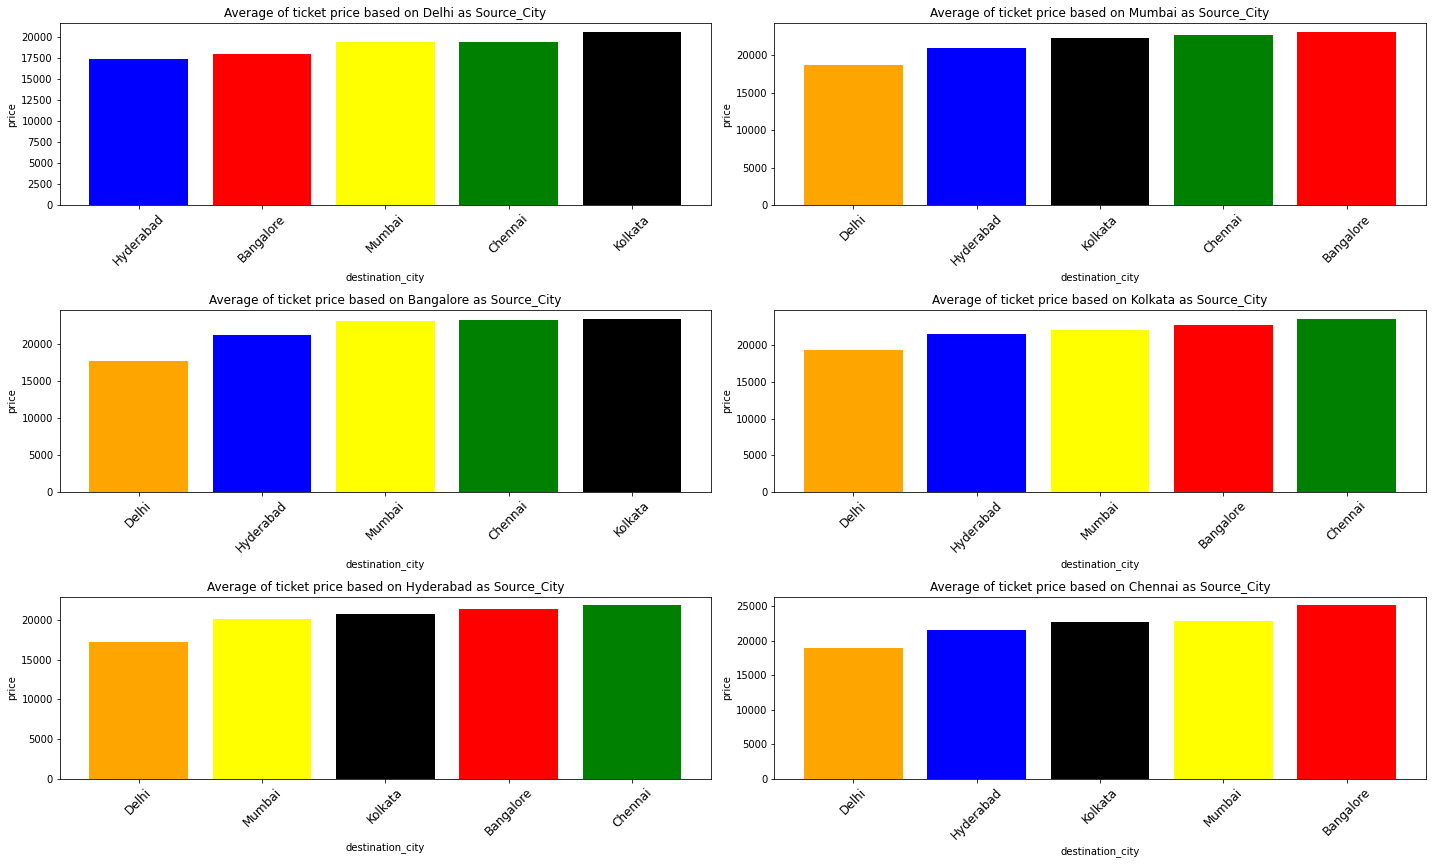

In [ ]:
plt.figure(figsize=(20,15))
for i in range(0, 6):
    plt.subplot(4,2, i+1) 
    if i==0:
      Delhi = source.loc[source["source_city"] == "Delhi"][["destination_city","price"]].sort_values(by="price").reset_index()
      #my_colors = ["red", "green","blue","black", "yellow"]
      my_colors = ["blue","red", "yellow", "green","black"]
      plt.bar(Delhi["destination_city"], Delhi["price"], color=my_colors) #, color=my_colors
      plt.xlabel('destination_city')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Delhi as Source_City")
    elif i==1:
      Mumbai = source.loc[source["source_city"] == "Mumbai"][["destination_city","price"]].sort_values(by="price").reset_index()
      #my_colors = ["red","green","orange","blue","black"]
      my_colors =['orange','blue','black','green','red']
      plt.bar(Mumbai["destination_city"], Mumbai["price"], color=my_colors)
      plt.xlabel('destination_city')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Mumbai as Source_City")
    elif i==2:
      Bangalore = source.loc[source["source_city"] == "Bangalore"][["destination_city","price"]].sort_values(by="price").reset_index()
      #my_colors = ["green","orange","blue","black","yellow"]
      my_colors = ['orange','blue','yellow','green','black']
      plt.bar(Bangalore["destination_city"], Bangalore["price"], color=my_colors)
      plt.xlabel('destination_city')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Bangalore as Source_City")
    elif i==3:
      Kolkata = source.loc[source["source_city"] == "Kolkata"][["destination_city","price"]].sort_values(by="price").reset_index()
      #my_colors = ["red","green","orange","blue","yellow"]
      my_colors = ['orange','blue','yellow','red','green']
      plt.bar(Kolkata["destination_city"], Kolkata["price"], color=my_colors)
      plt.xlabel('destination_city')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Kolkata as Source_City")
    elif i==4:
      Hyderabad = source.loc[source["source_city"] == "Hyderabad"][["destination_city","price"]].sort_values(by="price").reset_index()
      #my_colors = ["red","green","orange","black", "yellow"]
      my_colors =['orange','yellow','black','red','green']
      plt.bar(Hyderabad["destination_city"], Hyderabad["price"], color=my_colors)
      plt.xlabel('destination_city')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Hyderabad as Source_City")
    else:
      Chennai = source.loc[source["source_city"] == "Chennai"][["destination_city","price"]].sort_values(by="price").reset_index()
      #my_colors = ["red","orange","blue","black", "yellow"]
      my_colors = ['orange','blue','black','yellow','red']
      plt.bar(Chennai["destination_city"], Chennai["price"], color=my_colors)
      plt.xlabel('destination_city')
      plt.ylabel('price')
      plt.xticks(fontsize=12, rotation=45)
      plt.title("Average of ticket price based on Chennai as Source_City")
    plt.tight_layout()

Insight: Chennai-Bangalore is a pair of source-destination city with the highest ticket price throughout all trips in Easemytrip.

### Does price vary with Airlines?

In [ ]:
airline = pd_flight["airline"].unique().tolist()
airline

['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India']

In [ ]:
# Computing Coefficient of Variations (CV)
cv_airline = []
for i, plane in enumerate(airline):
  cv = pd_flight.loc[pd_flight["airline"] == plane]['price'].std()/pd_flight.loc[pd_flight["airline"] == plane]['price'].mean()
  cv = np.round(cv * 100, 2)
  cv_airline.append(cv)
print("Coefficient of Variations (CV):", cv_airline)

Coefficient of Variations (CV): [48.54, 69.03, 84.34, 44.48, 61.4, 88.93]


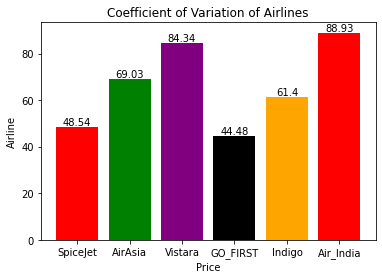

In [ ]:
# Plot the CV
fig, ax = plt.subplots()
plot = ax.bar(airline, cv_airline, color = ["red","green","purple","black","orange"])
ax.set_ylabel('Airline')
ax.set_xlabel('Price')
ax.set_title("Coefficient of Variation of Airlines");
rects = ax.patches
for rect, label in zip(rects, cv_airline):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )
plt.show()

Insight:

The ticket prices vary with airlines. Air India and Vistara are the most varying airline because of their higher CV.

### How does the ticket price vary between Economy and Business class?

In [ ]:
ticket_class = pd_flight["class"].unique().tolist()
ticket_class

['Economy', 'Business']

In [ ]:
# Computing Coefficient of Variations (CV)
cv_class = []
for i, plane in enumerate(ticket_class):
  cv = pd_flight.loc[pd_flight["class"] == plane]['price'].std()/pd_flight.loc[pd_flight["class"] == plane]['price'].mean()
  cv = np.round(cv * 100, 2)
  cv_class.append(cv)
print("Coefficient of Variations (CV):", cv_class)

Coefficient of Variations (CV): [56.96, 24.68]


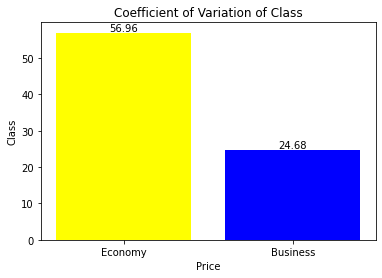

In [ ]:
# Plot the CV
fig, ax = plt.subplots()
plot = ax.bar(ticket_class, cv_class, color = ["yellow", "blue"])
ax.set_ylabel('Class')
ax.set_xlabel('Price')
ax.set_title("Coefficient of Variation of Class");
rects = ax.patches
for rect, label in zip(rects, cv_class):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )
plt.show()

Insight: Economy varies more than business class.

In [ ]:
pd_flight.groupby(["airline","class"]).agg({'price':[np.min, np.max]}).rename(columns={'amin':'min_price', 'amax': 'max_price'}, level=1)

price          
                   min_price max_price
airline   class                       
AirAsia   Economy       1105     31917
Air_India Business     12000     90970
          Economy       1526     42349
GO_FIRST  Economy       1105     32803
Indigo    Economy       1105     31952
SpiceJet  Economy       1106     34158
Vistara   Business     17604    123071
          Economy       1714     37646

Insight:

- Economy class varies more than business class because all of airlines have economy class.
- Air India and Vistara are airlines which have between economy and business class, while the others only have economy class. This answers previous analysis that finds higher CV of Air India and Vistara because of its high variation of price.
- AirAsia, Air India, Go First and Indigo have similar minimum ticket price in economy class
- The most expensive airline is Vistara

### Does ticket price change based on the number of stops between the source and destination cities?

In [ ]:
bins = np.linspace(min(pd_flight['duration']), max(pd_flight['duration']),4)
print(bins)

[ 0.83       17.16333333 33.49666667 49.83      ]


The writer has divided "duration" into 3 groups:
* Low: 0.83-17.163 hours
* Medium: 17.163-33.497 hours
* High: 33.497-49.83 hours

In [ ]:
group_names = ['Low','Medium','High']
pd_flight_bins = pd_flight.copy()
pd_flight_bins['duration_bins'] = pd.cut(pd_flight_bins['duration'],bins,labels=group_names,include_lowest=True)
pd_flight_bins.head() 

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_bins
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Low
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Low
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Low
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Low
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Low


In [ ]:
pd_flight_bins.groupby('duration_bins').agg({'price':[np.mean, np.min, np.max]}).rename(columns={'mean':'mean_price','amin':'min_price', 'amax': 'max_price'}, level=1)

price                    
                 mean_price min_price max_price
duration_bins                                  
Low            19630.553992      1105    123071
Medium         25507.349486      2477    116562
High           15313.040314      4802     82729

Insights:
* From lowest to highest price based on the mean: High, Low, Medium
* Low duration has been the highest maximum of the ticket price
* High duration affects the lowest minimum of the ticket price

# **Feature Engineering**

## Handling Outlier (Interquartile Range Analysis)

In [ ]:
def subset_by_iqr(df, column):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]

In [ ]:
# Example for whiskers = 1.5, as requested by the OP
print(f'Count of rows before removing outlier: {len(pd_flight)}')
pd_flight = subset_by_iqr(pd_flight, 'duration')
print(f'Count of rows after removing outlier: {len(pd_flight)}')

Count of rows before removing outlier: 300153
Count of rows after removing outlier: 298043


## Removing Unimportant Feature(s)

"Unnamed: 0" and "flight" are removed

In [ ]:
pd_flight = pd_flight.drop(['Unnamed: 0', 'flight'] ,axis=1)
pd_flight.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Categorical Encoding

The writer used One Hot Encoding to encode the categorical features/columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(encoder.fit_transform(pd_flight[['airline']]))
train_X_encoded.columns = encoder.get_feature_names(['airline'])
pd_flight = pd_flight.drop('airline', axis=1)
pd_flight = pd.concat([pd_flight.reset_index(drop=True), train_X_encoded], axis=1)
pd_flight.head()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0
1,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0
2,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0
3,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0
4,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
encoder = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(encoder.fit_transform(pd_flight[['source_city']]))
train_X_encoded.columns = encoder.get_feature_names(['source_city'])
pd_flight = pd_flight.drop('source_city', axis=1)
pd_flight = pd.concat([pd_flight.reset_index(drop=True), train_X_encoded], axis=1)
pd_flight.head()

,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
encoder = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(encoder.fit_transform(pd_flight[['departure_time']]))
train_X_encoded.columns = encoder.get_feature_names(['departure_time'])
pd_flight = pd_flight.drop('departure_time', axis=1)
pd_flight = pd.concat([pd_flight.reset_index(drop=True), train_X_encoded], axis=1)
pd_flight.head()

,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,zero,Morning,Mumbai,Economy,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,zero,Morning,Mumbai,Economy,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
encoder = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(encoder.fit_transform(pd_flight[['stops']]))
train_X_encoded.columns = encoder.get_feature_names(['stops'])
pd_flight = pd_flight.drop(['stops'] ,axis=1)
pd_flight = pd.concat([pd_flight.reset_index(drop=True), train_X_encoded], axis=1)
pd_flight.head()

,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero
0,Night,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Morning,Mumbai,Economy,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Early_Morning,Mumbai,Economy,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Morning,Mumbai,Economy,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
encoder = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(encoder.fit_transform(pd_flight[['arrival_time']]))
train_X_encoded.columns = encoder.get_feature_names(['arrival_time'])
pd_flight = pd_flight.drop(['arrival_time'], axis=1)
pd_flight = pd.concat([pd_flight.reset_index(drop=True), train_X_encoded], axis=1)
pd_flight.head()

,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,Mumbai,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Mumbai,Economy,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Mumbai,Economy,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Mumbai,Economy,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Mumbai,Economy,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
encoder = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(encoder.fit_transform(pd_flight[['destination_city']]))
train_X_encoded.columns = encoder.get_feature_names(['destination_city'])
pd_flight = pd_flight.drop(['destination_city'], axis=1)
pd_flight = pd.concat([pd_flight.reset_index(drop=True), train_X_encoded], axis=1)
pd_flight.head()

,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,Economy,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Economy,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Economy,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Economy,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Economy,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
encoder = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(encoder.fit_transform(pd_flight[['class']]))
train_X_encoded.columns = encoder.get_feature_names(['class'])
pd_flight = pd_flight.drop(['class'], axis=1)
pd_flight = pd.concat([pd_flight.reset_index(drop=True), train_X_encoded], axis=1)
pd_flight.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.33,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.17,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.25,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.33,1,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
pd_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298043 entries, 0 to 298042
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      298043 non-null  float64
 1   days_left                     298043 non-null  int64  
 2   price                         298043 non-null  int64  
 3   airline_AirAsia               298043 non-null  float64
 4   airline_Air_India             298043 non-null  float64
 5   airline_GO_FIRST              298043 non-null  float64
 6   airline_Indigo                298043 non-null  float64
 7   airline_SpiceJet              298043 non-null  float64
 8   airline_Vistara               298043 non-null  float64
 9   source_city_Bangalore         298043 non-null  float64
 10  source_city_Chennai           298043 non-null  float64
 11  source_city_Delhi             298043 non-null  float64
 12  source_city_Hyderabad         298043 non-nul

# **Data Preparation**

In [ ]:
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from scipy.stats import boxcox

## Training-Testing Split

The writer splitted dataset into 70% of training data and 30% of testing data

In [ ]:
# Separate features and target variables
df_features = pd_flight.loc[:, pd_flight.columns != "price"]
df_target = pd_flight["price"]

In [ ]:
df_features.head()

,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,2.17,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2.33,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2.17,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2.25,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.33,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df_target.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, 
                                                    random_state=42)

## Feature Scaling

Feature scaling is done by standardization such that the dataset will approach to normal distribution

In [ ]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
# Convert back to DataFrame for readability
X_train_s = pd.DataFrame(data=X_train_s)
X_train_s.columns = [str(col) for col in df_features.columns.values]

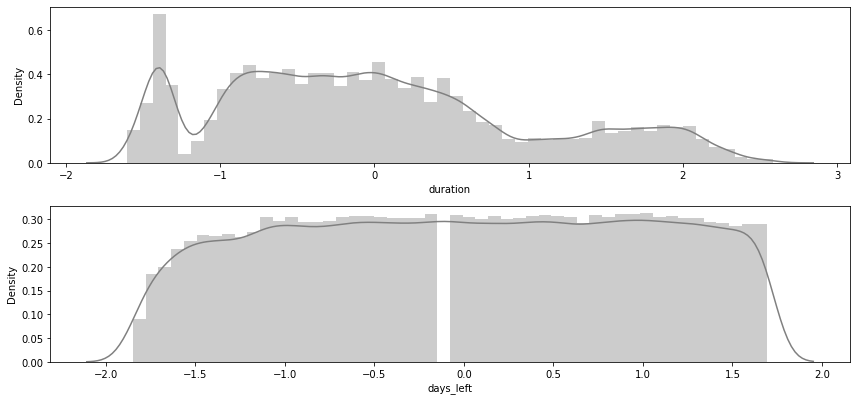

In [ ]:
num = ['duration', 'days_left']
plt.figure(figsize=(12, 8))
for i in range(0, len(num)):
    plt.subplot(3, len(num)/2, i+1)
    sns.distplot(X_train_s[num[i]], color='gray')
    plt.tight_layout()

## Box Cox Transformation for Target Variable (Optional)



In [ ]:
bc_result = boxcox(y_train)
y_train_bc = bc_result[0]
lam = bc_result[1]

In [ ]:
y_train_bc.shape

(208630,)

In [ ]:
y_test.shape

(89413,)

# **Modelling and Evaluation**

* Three linear regression models are used: Multiple Linear Regression, Polynomial Regression, and Lasso Regression
* The model will be evaluated by 3-Fold Validation to check whether the model is overfitting or underfitting.

In [ ]:
# Faster the training from scikit-learn
!pip install scikit-learn-intelex

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_predict
from scipy.special import inv_boxcox
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
#from sklearnex import patch_sklearn 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso

#patch_sklearn()

## Multiple Linear Regression

### Model Training and Checking

In [ ]:
np.any(np.isnan(df_features))

False

Success!
Success!
Success!


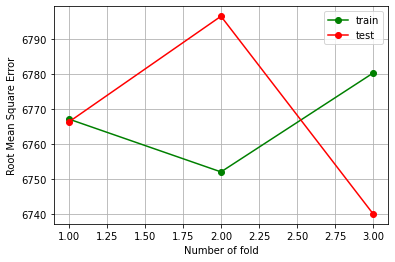

In [ ]:
# Model without Box Cox Transformation
scores_train = []
scores_test = []

lr = LinearRegression()
s = StandardScaler()

kf = KFold(shuffle=True,random_state=42, n_splits=3) #random_state equals to previous train_test_split

for train_index, test_index in kf.split(df_features):
    X_train, X_test, y_train, y_test = (df_features.iloc[train_index, :], 
                                        df_features.iloc[test_index, :], 
                                        df_target[train_index], 
                                        df_target[test_index])
    X_train_s = s.fit_transform(X_train)
    lr.fit(X_train_s, y_train)
    print("Success!")
    X_test_s = s.transform(X_test)
    # Predict training and testing
    y_train_pred = lr.predict(X_train_s)
    y_pred = lr.predict(X_test_s)
    # Evaluating training and testing
    score_train = mean_squared_error(y_train.values, y_train_pred, squared=False)
    score_test = mean_squared_error(y_test.values, y_pred, squared=False)
    scores_train.append(score_train)
    scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Root Mean Square Error')
plt.show()

Therefore, Multiple Linear Regression without Box Cox Transformation is not overfitting or underfitting.

Success!
Success!
Success!


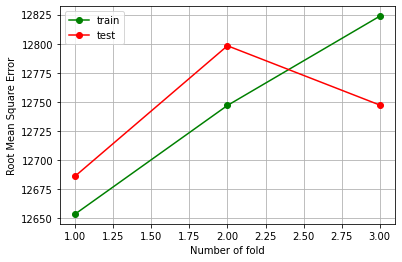

In [ ]:
# Model with Box Cox Transformation
scores_train = []
scores_test = []

lr = LinearRegression()
s = StandardScaler()

kf = KFold(shuffle=True,random_state=42, n_splits=3) #random_state equals to previous train_test_split

for train_index, test_index in kf.split(df_features):
    X_train, X_test, y_train, y_test = (df_features.iloc[train_index, :], 
                                        df_features.iloc[test_index, :], 
                                        df_target[train_index], 
                                        df_target[test_index])
    X_train_s = s.fit_transform(X_train)
    bc_result = boxcox(y_train)
    y_train_bc = bc_result[0]
    lam = bc_result[1]
    lr.fit(X_train_s, y_train_bc)
    print("Success!")
    X_test_s = s.transform(X_test)
    # Predict training and testing
    y_train_pred = lr.predict(X_train_s)
    y_pred = lr.predict(X_test_s)
    # Inverse transform training and testing
    y_train_pred = inv_boxcox(y_train_pred,lam)
    y_pred = inv_boxcox(y_pred,lam)
    # Evaluating training and testing
    score_train = mean_squared_error(y_train.values, y_train_pred, squared=False)
    score_test = mean_squared_error(y_test.values, y_pred, squared=False)
    scores_train.append(score_train)
    scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Root Mean Square Error')
plt.show()

* Therefore, Multiple Linear Regression with Box Cox Transformation is not overfitting or underfitting

* Because the error from Multiple Linear Regression without Box Cox Transformation is lower than with Box Cox Transformation, Multiple Linear Regression without Box Cox Transformation will be chosen to compare with other linear regression models.

### Evaluation

In [ ]:
# Without Box Cox Transformation
lr2 = LinearRegression()

# Training the model
lr2.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr2.predict(X_test_s)
print("R2_Score without Box Cox Transformation",r2_score(y_test, y_pred))

R2_Score without Box Cox Transformation 0.9117098176881215


In [ ]:
# With Box Cox Transformation
lr = LinearRegression()

# Training the model
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)
# Inverse the box-cox transformation to obtain the previous real values
y_pred_tran = inv_boxcox(y_pred_bc,lam)
print("R2_Score with Box Cox Transformation",r2_score(y_test, y_pred_tran))

R2_Score with Box Cox Transformation 0.6860864584358104


In [ ]:
y_test.shape

(90046,)

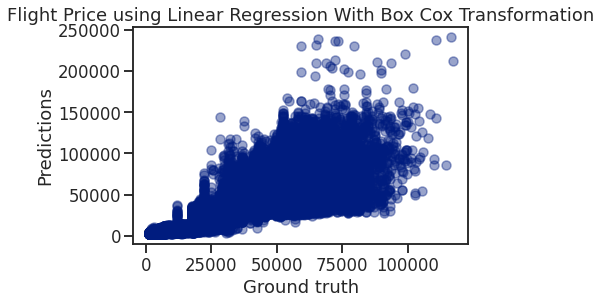

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred_tran, alpha = 0.4)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price using Linear Regression With Box Cox Transformation');

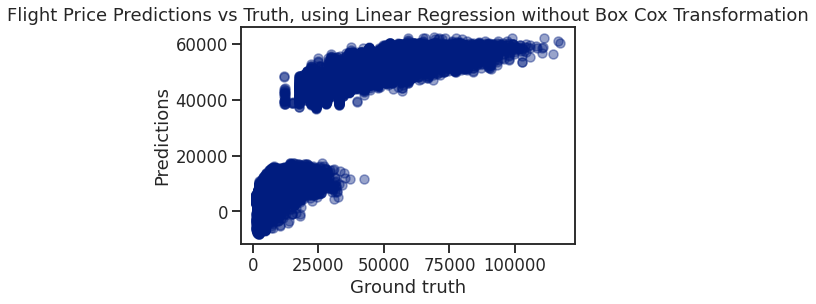

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha = 0.4)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price Predictions vs Truth, using Linear Regression without Box Cox Transformation');

As we have seen that Multiple Linear Regression has failed to capture flight ticket price in range [0,50000) which is lower price

## Polynomial Regression



The writer choose the maximum degree of polynomial = 2 because the dataset have too many features such that the polynomial transformation of the features will not affect too many addition to the features of the dataset

In [ ]:
# Polynomial Features (Degree=2)
pf = PolynomialFeatures(degree=2)
X_pf = pf.fit_transform(df_features) #transform our data
X_pf = pd.DataFrame(X_pf)
X_pf.columns = pf.get_feature_names(df_features.columns)
X_pf.head()

,1,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration^2,duration days_left,duration airline_AirAsia,duration airline_Air_India,duration airline_GO_FIRST,duration airline_Indigo,duration airline_SpiceJet,duration airline_Vistara,duration source_city_Bangalore,duration source_city_Chennai,duration source_city_Delhi,duration source_city_Hyderabad,duration source_city_Kolkata,duration source_city_Mumbai,duration departure_time_Afternoon,duration departure_time_Early_Morning,duration departure_time_Evening,duration departure_time_Late_Night,duration departure_time_Morning,duration departure_time_Night,duration stops_one,duration stops_two_or_more,duration stops_zero,duration arrival_time_Afternoon,duration arrival_time_Early_Morning,duration arrival_time_Evening,duration arrival_time_Late_Night,duration arrival_time_Morning,duration arrival_time_Night,duration destination_city_Bangalore,duration destination_city_Chennai,duration destination_city_Delhi,duration destination_city_Hyderabad,duration destination_city_Kolkata,duration destination_city_Mumbai,duration class_Business,duration class_Economy,days_left^2,days_left airline_AirAsia,days_left airline_Air_India,days_left airline_GO_FIRST,days_left airline_Indigo,days_left airline_SpiceJet,days_left airline_Vistara,days_left source_city_Bangalore,days_left source_city_Chennai,days_left source_city_Delhi,days_left source_city_Hyderabad,days_left source_city_Kolkata,days_left source_city_Mumbai,days_left departure_time_Afternoon,days_left departure_time_Early_Morning,days_left departure_time_Evening,days_left departure_time_Late_Night,days_left departure_time_Morning,days_left departure_time_Night,days_left stops_one,days_left stops_two_or_more,days_left stops_zero,days_left arrival_time_Afternoon,days_left arrival_time_Early_Morning,days_left arrival_time_Evening,days_left arrival_time_Late_Night,days_left arrival_time_Morning,days_left arrival_time_Night,days_left destination_city_Bangalore,days_left destination_city_Chennai,days_left destination_city_Delhi,days_left destination_city_Hyderabad,days_left destination_city_Kolkata,days_left destination_city_Mumbai,days_left class_Business,days_left class_Economy,airline_AirAsia^2,airline_AirAsia airline_Air_India,airline_AirAsia airline_GO_FIRST,airline_AirAsia airline_Indigo,airline_AirAsia airline_SpiceJet,airline_AirAsia airline_Vistara,airline_AirAsia source_city_Bangalore,airline_AirAsia source_city_Chennai,airline_AirAsia source_city_Delhi,airline_AirAsia source_city_Hyderabad,airline_AirAsia source_city_Kolkata,airline_AirAsia source_city_Mumbai,airline_AirAsia departure_time_Afternoon,airline_AirAsia departure_time_Early_Morning,airline_AirAsia departure_time_Evening,airline_AirAsia departure_time_Late_Night,airline_AirAsia departure_time_Morning,airline_AirAsia departure_time_Night,airline_AirAsia stops_one,airline_AirAsia stops_two_or_more,airline_AirAsia stops_zero,airline_AirAsia arrival_time_Afternoon,airline_AirAsia arrival_time_Early_Morning,airline_AirAsia arrival_time_Evening,airline_AirAsia arrival_time_Late_Night,airline_AirAsia arrival_time_Morning,airline_AirAsia arrival_time_Night,airline_AirAsia destination_city_Bangalore,airline_AirAsia destination_city_Chennai,airline_AirAsia destination_city_Delhi,airline_AirAsia destinatio

Success!
Success!
Success!


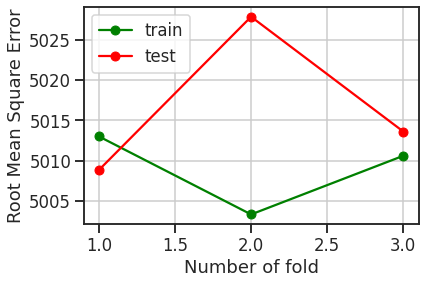

In [ ]:
# Model without Box Cox Transformation
scores_train = []
scores_test = []

lr = LinearRegression()
s = StandardScaler()

kf = KFold(shuffle=True,random_state=42, n_splits=3) #random_state equals to previous train_test_split

for train_index, test_index in kf.split(X_pf):
    X_train, X_test, y_train, y_test = (X_pf.iloc[train_index, :], 
                                        X_pf.iloc[test_index, :], 
                                        df_target[train_index], 
                                        df_target[test_index])
    X_train_s = s.fit_transform(X_train)
    lr.fit(X_train_s, y_train)
    print("Success!")
    X_test_s = s.transform(X_test)
    # Predict training and testing
    y_train_pred = lr.predict(X_train_s)
    y_pred = lr.predict(X_test_s)
    # Evaluating training and testing
    score_train = mean_squared_error(y_train.values, y_train_pred, squared=False)
    score_test = mean_squared_error(y_test.values, y_pred, squared=False)
    scores_train.append(score_train)
    scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Root Mean Square Error')
plt.show()

### Model Training and Checking

In [ ]:
# Without Box Cox Transformation
X_train, X_test, y_train, y_test = train_test_split(X_pf, df_target, test_size=0.3, 
                                                    random_state=42)
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
lr2 = LinearRegression()
# Training the model
lr2.fit(X_train_s, y_train)
print("Success!")

Success!


### Evaluation

In [ ]:
X_test_s = s.transform(X_test)
y_pred = lr2.predict(X_test_s)
print("R2_Score of Polynomial Regression",r2_score(y_test, y_pred))

R2_Score of Polynomial Regression 0.9514211399109667


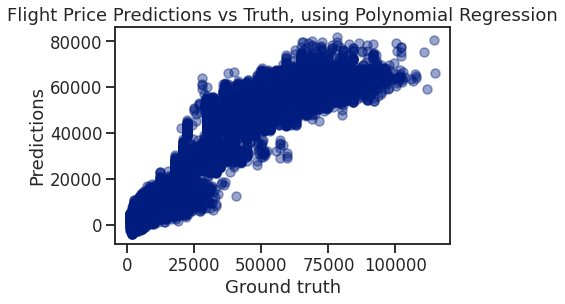

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha = 0.4)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price Predictions vs Truth, using Polynomial Regression');

Because the model with polynomial features are better than without polynomial feature, then the writer will add polynomial features in Lasso Regression.

## Lasso Regression

* Linear regression which performs shrinkage regularization with automatically selecting features
* Lasso has one important hyperparameter, that is `alpha`. To find the best `alpha`, the writer used hyperparameter tuning for training the model.

### Model Training and Checking

In [ ]:
# Hyperparameter Tuning
# A pipeline contains a series of steps, where a step is ("name of step", actual_model). 
# The "name of step" string is only used to help you identify which step you are on, 
# and to allow you to specify parameters at that step.
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2],
    'lasso_regression__alpha': np.geomspace(0.06, 6.0, 20)
}
kf = KFold(shuffle=True, random_state=42, n_splits=3)
grid_search = GridSearchCV(estimator, params, cv=kf, verbose=3, n_jobs = -1, scoring='r2')
grid_result = grid_search.fit(df_features, df_target)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
"""
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
"""

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best: 0.951303 using {'lasso_regression__alpha': 0.20158909717702692, 'polynomial_features__degree': 2}


'\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\'] \nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [ ]:
def show3D(searcher, grid_param_1, grid_param_2, name_param1, name_param2, rot=0):
    scores_mean = searcher.cv_results_['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1)).T

    print('Best params = {}'.format(searcher.best_params_))
    print('Best score = {}'.format(scores_mean.max()))

    _, ax = plt.subplots(1,1)

    for idx, val in enumerate(grid_param_1):
        ax.plot(grid_param_2, scores_mean[idx,:], '-o', label=name_param1 + ': ' + str(val))

    ax.tick_params(axis='x', rotation=rot)
    ax.set_title('Grid Search Scores')
    ax.set_xlabel(name_param2)
    ax.set_ylabel('r_2 score')
    ax.legend(loc='best')
    ax.grid('on')

Best params = {'lasso_regression__alpha': 0.20158909717702692, 'polynomial_features__degree': 2}
Best score = 0.9513032782097949


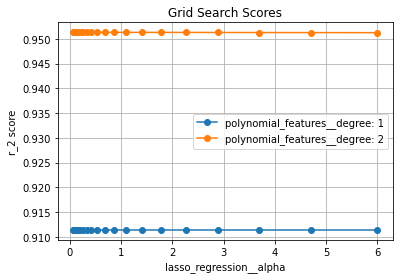

In [ ]:
grid_param_1 = params['polynomial_features__degree']
grid_param_2 = params['lasso_regression__alpha']
show3D(grid_result, grid_param_1, grid_param_2, 'polynomial_features__degree','lasso_regression__alpha', 0)
#searcher.cv_results_['mean_test_score']

Saved alpha=0.20158909717702692

Success!
Success!
Success!


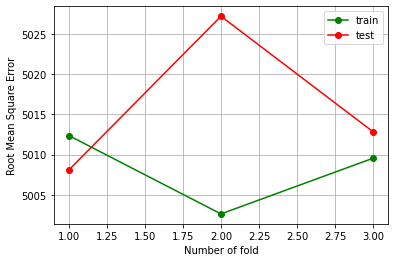

In [ ]:
scores_train = []
scores_test = []

lr = Lasso(alpha=0.20158909717702692) # alpha=0.20158909717702692
s = StandardScaler()

kf = KFold(shuffle=True,random_state=42, n_splits=3) #random_state equals to previous train_test_split

for train_index, test_index in kf.split(X_pf):
    X_train, X_test, y_train, y_test = (X_pf.iloc[train_index, :], 
                                        X_pf.iloc[test_index, :], 
                                        df_target[train_index], 
                                        df_target[test_index])
    X_train_s = s.fit_transform(X_train)
    lr.fit(X_train_s, y_train)
    print("Success!")
    X_test_s = s.transform(X_test)
    # Predict training and testing
    y_train_pred = lr.predict(X_train_s)
    y_pred = lr.predict(X_test_s)
    # Evaluating training and testing
    score_train = mean_squared_error(y_train.values, y_train_pred, squared=False)
    score_test = mean_squared_error(y_test.values, y_pred, squared=False)
    scores_train.append(score_train)
    scores_test.append(score_test)

folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, scores_train, 'o-', color='green', label='train')
plt.plot(folds, scores_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Root Mean Square Error')
plt.show()

Therefore, the model from Lasso Regression is not overfitting or underfitting

In [ ]:
# Without Box Cox Transformation
X_train, X_test, y_train, y_test = train_test_split(X_pf, df_target, test_size=0.3, 
                                                    random_state=42)
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
lr2 = Lasso(alpha=0.2568799439231636)
# Training the model
lr2.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr2.predict(X_test_s)
print("Success!")

Success!


### Evaluation

In [ ]:
print("R2_Score of Lasso Regression",r2_score(y_test, y_pred))

R2_Score of Lasso Regression 0.9514499555941247


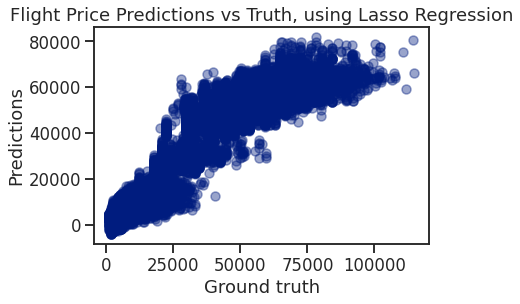

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_pred, alpha = 0.4)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Flight Price Predictions vs Truth, using Lasso Regression');

Lasso regression model tends to similar with Polynomial Regression. It can captures model very well. However, in order to compare between Polynomial and Lasso, the writer needs to check the evaluation between models.

# **Model Selection**

In [ ]:
df_model = pd.DataFrame(columns = ['Type','RMSE', 'R2 Score'])
linreg = ['Multiple Linear Regression', 'Polynomial Regression','Lasso Regression']

In [ ]:
for i, method in enumerate(linreg):

  if i == 0:
    X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, 
                                                    random_state=42)
    s = StandardScaler()
    X_train_s = s.fit_transform(X_train)
    lr= LinearRegression()
    lr.fit(X_train_s, y_train)
    X_test_s = s.transform(X_test)
    y_pred = lr.predict(X_test_s)
    print("Success!")
  
  elif i == 1:
    X_train, X_test, y_train, y_test = train_test_split(X_pf, df_target, test_size=0.3, 
                                                    random_state=42)
    s2 = StandardScaler()
    X_train_s = s2.fit_transform(X_train)
    lr2 = LinearRegression()
    lr2.fit(X_train_s, y_train)
    X_test_s = s2.transform(X_test)
    y_pred = lr2.predict(X_test_s)
    print("Success!")

  else:
    X_train, X_test, y_train, y_test = train_test_split(X_pf, df_target, test_size=0.3, 
                                                    random_state=42)
    s3 = StandardScaler()
    X_train_s = s3.fit_transform(X_train)
    lasso = Lasso(alpha=0.2568799439231636)
    # Training the model
    lasso.fit(X_train_s, y_train)
    X_test_s = s3.transform(X_test)
    y_pred = lasso.predict(X_test_s)
    print("Success!")

  #RMSE Score
  rmse_value = mean_squared_error(y_test, y_pred, squared=False)
    
  #R2 Score
  r2_value = r2_score(y_test, y_pred)
    
  df_model = df_model.append({'Type': method,  
                    'RMSE': rmse_value,
                    'R2 Score': r2_value},
                     ignore_index=True)
  
print("The dataframe of evaluation is created!")

Success!
Success!
Success!
The dataframe of evaluation is created!


In [ ]:
df_model

,Type,RMSE,R2 Score
0,Multiple Linear Regression,6774.180186,0.911250
1,Polynomial Regression,5011.836200,0.951421
2,Lasso Regression,5010.349536,0.951450


In summary, Lasso Regression has been chosen to be the best linear regression 
model to predict flight ticket price.

# **Model Saving using Pickle**

The writer saved the chosen model for future deployment of flight price prediction.

The model was saved into "pkl" file and had been attached to GitHub.

In [ ]:
import pickle
Pkl_Filename = "model_lasso.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lasso, file)

# **Get Insights from the Selected Model**

In [ ]:
# get importance
importance = lasso.coef_
importance.shape

(741,)

In [ ]:
print('Length of features (with Polynomial Features) is',X_pf.columns.shape[0])

Length of features (with Polynomial Features) is 741


In [ ]:
print('Length of features after Feature Selection in Lasso is',feature_importance[feature_importance['importance']==0].shape[0])

Length of features after Feature Selection in Lasso is 197


In [ ]:
feature_importance = pd.DataFrame({'features':X_pf.columns,'importance':importance})
feature_importance.tail()

,features,importance
736,destination_city_Mumbai class_Business,306.825688
737,destination_city_Mumbai class_Economy,-22.691031
738,class_Business^2,0.000000
739,class_Business class_Economy,0.000000
740,class_Economy^2,-0.000000


In [ ]:
feature_importance[feature_importance['importance']>0].sort_values('importance', ascending = False).head(10)

,features,importance
36,class_Business,16227.333386
1,duration,5868.820661
75,days_left^2,4636.255781
213,airline_Indigo^2,3345.517850
8,airline_Vistara,3004.452220
304,airline_Vistara class_Business,2827.919224
180,airline_GO_FIRST^2,1716.492163
245,airline_SpiceJet^2,1680.821779
111,airline_AirAsia^2,1628.961069
290,airline_Vistara stops_two_or_more,1184.481209


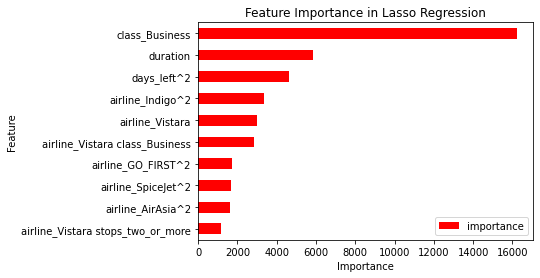

In [ ]:
plot = feature_importance[feature_importance['importance']>0].sort_values('importance', ascending = False).head(10).plot.barh(color='red')
plot.set_yticklabels(feature_importance[feature_importance['importance']>0].sort_values('importance', ascending = False).head(10).features)
plt.title('Feature Importance in Lasso Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

* Business Class has been the most important feature in Lasso's prediction because it is a special class which exists only in Air India and Vistara. The chosen class determines the ticket prices in prediction.
* Duration is important to determine the ticket price. Therefore, customer should consider the overall amount of time it takes to travel between cities before ordering flight tickets.

# **Summary of Findings and Suggestions**

* If passengers want cheaper tickets, they should buy around 25-30 days before departure. Buying tickets 1-2 days before departure is only for emergency
* The best departure for cheaper tickets occures when passengers choose Late Night or Early Morning as departure and arrival time
* Bangalore, Chennai, and Kolkata are the top 3 highest ticket price
* Delhi and Hyderabad are considered as top 2 lowest ticket price
* If passengers want to try business class in cheaper mode, then they should choose Air India. But, if passengers choose the most likable business class with best facilities (and higher ticket price absolutely), they may choose Vistara.
* If passengers want cheaper ticket, they should choose flight higher duration between cities. The more less duration between cities, the higher ticket price should be.
* The standard multiple linear regression model is severely under performing on low and high valued tickets, while the polynomial and ridge models are smoothly fit across the entire range of ticket prices.
* Lasso regression with alpha between 0 and 1 has been the best alpha for modelling by searching from hyperparameter tuning (GridSearch)
* Lasso regression tends to remove more features in using the polynomial features
* Showing the list of features the model believes are the most important in predicting the ticket price to give insights